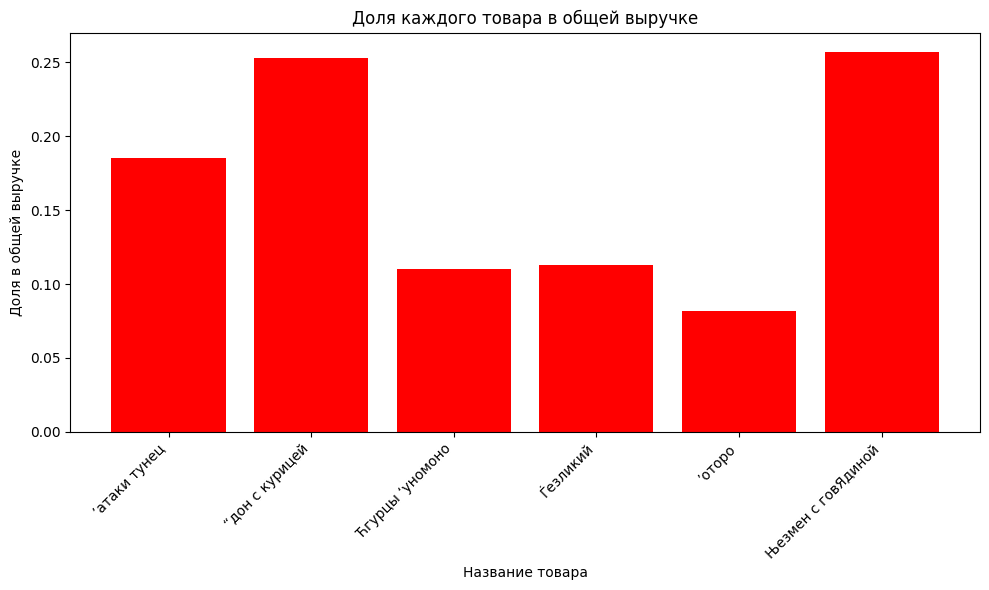

Общая выручка магазина: 209710.0
Товар, который был продан наибольшее количество раз: Ћгурцы ‘уномоно (110 раз)
Товар, который принес наибольшую выручку: Њезмен с говЯдиной (53940.0)
Информация по каждому товару:
’атаки тунец: Продано 38860.0 раз, доля в общей выручке: 18.53%
“дон с курицей: Продано 53100.0 раз, доля в общей выручке: 25.32%
Ћгурцы ‘уномоно: Продано 23100.0 раз, доля в общей выручке: 11.02%
Ѓезликий: Продано 23600.0 раз, доля в общей выручке: 11.25%
’оторо: Продано 17110.0 раз, доля в общей выручке: 8.16%
Њезмен с говЯдиной: Продано 53940.0 раз, доля в общей выручке: 25.72%



In [ ]:
import csv
from collections import defaultdict
import matplotlib.pyplot as pypl

# быстрая сортировка
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    flag = arr[len(arr) // 2][1]
    left = []
    middle = []
    right = []
    for i in arr:
      if i[1] < flag:
        left.append(i)
      elif i[1] > flag:
        right.append(i)
      else:
        middle.append(i)

    return quicksort(left) + middle + quicksort(right)


# чтение данных из файла
def read_data_sales(file_path):
    data_sales = []
    with open(file_path, newline='', encoding='windows-1251') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        next(reader)
        for row in reader:
            data_sales.append({
                'Номер заказа': int(row[0]),
                'Дата заказа': row[1],
                'Название товара': row[2],
                'Категория товара': row[3],
                'Количество продаж': int(row[4]),
                'Цена за единицу': float(row[5]),
                'Общая стоимость': float(row[6])
            })
    return data_sales

# Вывод всех данных и результатов
def generate_data(data_sales):

    total_sales = sum(row['Общая стоимость'] for row in data_sales)
    popular_position, sold_count = find_popular_position(data_sales)
    big_revenue_product, big_revenue = find_big_revenue(data_sales)

    data = f"Общая выручка магазина: {total_sales}\n"
    data += f"Товар, который был продан наибольшее количество раз: {popular_position} ({sold_count} раз)\n"
    data += f"Товар, который принес наибольшую выручку: {big_revenue_product} ({big_revenue})\n"

    # График доли в общей выручке для каждого товара
    product_count = defaultdict(int)
    for row in data_sales:
        product_count[row['Название товара']] += row['Общая стоимость']
    product_revenues = [product_count[product] / total_sales for product in product_count.keys()]

    # Генерация графика для визуализации
    pypl.figure(figsize=(10, 6))
    pypl.bar(product_count.keys(), product_revenues, color='red')
    pypl.xlabel('Название товара')
    pypl.ylabel('Доля в общей выручке')
    pypl.title('Доля каждого товара в общей выручке')
    pypl.xticks(rotation=45, ha='right')
    pypl.tight_layout()
    pypl.show()

    data += "Информация по каждому товару:\n"
    for product, sales_count in product_count.items():
        product_revenue = sum(row['Общая стоимость'] for row in data_sales if row['Название товара'] == product)
        data += f"{product}: Продано {sales_count} раз, доля в общей выручке: {product_revenue/total_sales:.2%}\n"

    return data

# Поиск позиции с самой большой выручкой
def find_big_revenue(data_sales):
    sorted_data_sales = sorted(data_sales, key=lambda product: product['Общая стоимость'])
    highest_revenue_product = sorted_data_sales[-1]['Название товара']
    highest_revenue = sorted_data_sales[-1]['Общая стоимость']
    return highest_revenue_product, highest_revenue


# Поиск наиболее популярной позиции
def find_popular_position(data_sales):
    product_sales_count = defaultdict(int)
    for row in data_sales:
        product_sales_count[row['Название товара']] += row['Количество продаж']

    sorted_products = quicksort(list(product_sales_count.items()))
    popular_position, sold_count = sorted_products[-1]
    return popular_position, sold_count


# функция для запуска всех функций
def main(file_path):
    try:
        data_sales = read_data_sales(file_path)
        report = generate_data(data_sales)
        print(report)
    except FileNotFoundError:
        print("Файл не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

file_path = 'sample_data/data_sales.csv'
main(file_path)